In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 30 19:19:04 2019

@author: Gladwin PC
"""

'\nCreated on Wed Oct 30 19:19:04 2019\n\n@author: Gladwin PC\n'

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read the Image
image = 'coin.jpg'
img = cv2.imread(image, 1)

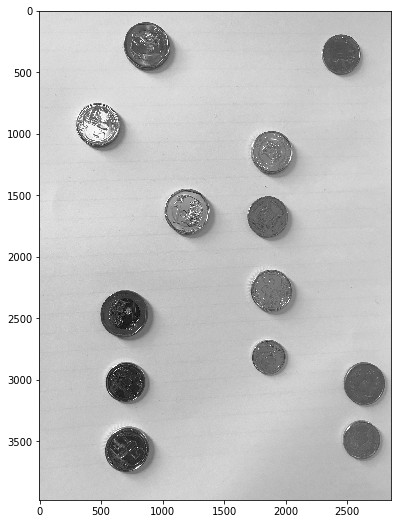

In [4]:
#Original_Copy
img_org = img.copy()
#Convert to GrayScale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img, cmap='gray')

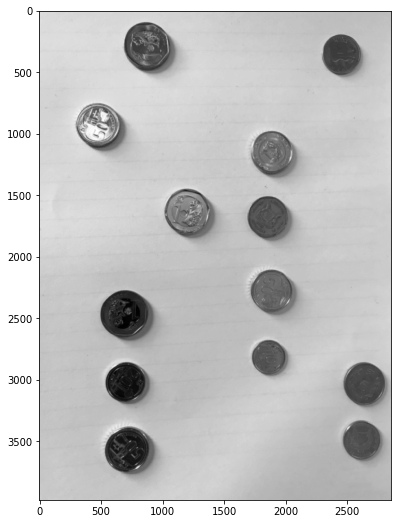

In [5]:
#Blur the imgae(Parameters can vary from image to image)
img = cv2.GaussianBlur(img, (31,31), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img, cmap='gray')

In [6]:
#Detecting the coins using HOUGH CIRCLE TRANSFORM
#Parameters like minDist, minRadius, maxRadius can vary from image to image
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=120, param1=50, param2=30, minRadius=90, maxRadius=220)
circles = np.uint16(np.around(circles_float))
print(circles)
print(circles.shape)

[[[1202 1634  184]
  [ 476  938  170]
  [ 678 2470  180]
  [ 868  284  185]
  [2638 3026  168]
  [ 714 3578  178]
  [1856 1676  166]
  [ 698 3026  157]
  [1888 1142  161]
  [2452  350  152]
  [1886 2276  170]
  [1872 2816  143]
  [2630 3486  166]]]
(1, 13, 3)


In [7]:
#Reduce the dimension and sort along 0th index(x-coordinate of the centres of the circles)
circles = np.squeeze(circles)
circles = circles[ circles[:,0].argsort()]
print(circles)
print(circles.shape)

[[ 476  938  170]
 [ 678 2470  180]
 [ 698 3026  157]
 [ 714 3578  178]
 [ 868  284  185]
 [1202 1634  184]
 [1856 1676  166]
 [1872 2816  143]
 [1886 2276  170]
 [1888 1142  161]
 [2452  350  152]
 [2630 3486  166]
 [2638 3026  168]]
(13, 3)


In [8]:
#----------------------------Algorithm for finding the coins that fall under the same st.line (Vertical)--------------------------------------

#We find all the circles whose x-coordinates of the centres have difference less than 40(say)
#If the diff. in x-coordinates of the centre are more than 40, we say that circles are not aligned i.e, not along same st.line
lines = np.empty([0,3] ,dtype=int)

i=0
while(i < circles.shape[0] - 1):
    j=i+1
    b=False
    nxt=1
    min_y = circles[i][1]
    max_y = circles[i][1]
    while(j < circles.shape[0]):
        if(circles[j][0] - circles[i][0] <= 40): #Here the number '40' might vary from image to image
            x1 = circles[i][0]
            if circles[j][1] < min_y:
                min_y = circles[j][1]
            
            x2 = circles[j][0]
            if circles[j][1] > max_y:
                max_y = circles[j][1]
                
            b=True
            nxt+=1
            
        j=j+1
    if b:
        x=int(np.mean([x1,x2]))
        lines = np.append(lines, [[x, min_y, max_y]], axis=0)
    i+=nxt

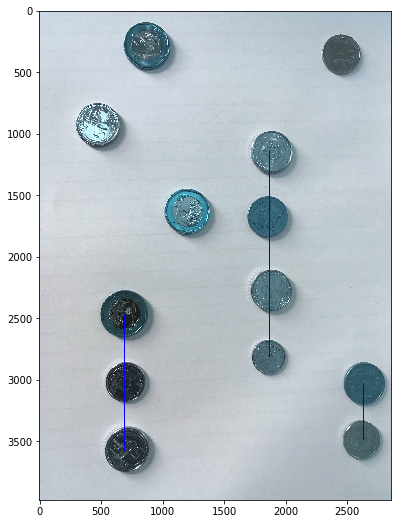

In [9]:
#Drawing lines for coins that fall under the same straight line.(Vertical)
output = img_org.copy()
for i in range(lines.shape[0]):
    output = cv2.line(output, (lines[i][0],lines[i][1]), (lines[i][0],lines[i][2]), (0,0,255), 6)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(output)